In [2]:
import pygad
from random import randint
import numpy as np
import timeit
import re
import matplotlib.pyplot as plt
import statistics 
plt.rcParams.update({'font.size': 16})

In [3]:
def plot_values(S,E,I,R,x):
    plt.figure(figsize=(10,5.5))
    plt.grid()
    plt.title('COVID-19 virus evolution')
    plt.xlabel('Days')
    plt.ylabel('Case percentage')
    #plt.plot(120000+np.zeros(1000), 'black', linewidth = 3, label = 'healthcare capacity')
    #plt.ylim(0, 0.05)
    #plt.axhline(y=beds, color='b', linestyle='-', label="Total rooms")

    plt.plot(x, S, '-b', label='Sus')
    plt.plot(x, E, '-g', label='Exp')
    I = [e * 0.05 for e in I]
    plt.plot(x, I, '-r', label='Inf')   
    plt.plot(x, R, '-y', label='Rec')
    #plt.plot(x, beds, '-c', label='Beds')
    #plt.axhline(y=0.0015, label='Porcentaje de camas')
    
    plt.legend()
    plt.show()
    
def listToString(s):  
    # initialize an empty string 
    str1 = ""  
    # traverse in the string   
    for ele in s:  
        str1 += str(ele)   
    # return string   
    return str1

In [4]:
def convert_fenotype(fenotype):
    cont = 3
    day_phase = []
    for elem in fenotype:
        if elem == 3:
            if cont !=0:
                cont = cont-1
        day_phase.append(cont)
    return day_phase

In [9]:
def fitness_func(fenotype):
    ind = convert_fenotype(fenotype)
    ind = fenotype
    fitness = []
    infected = []
    l_actions = []
    S_0, E_0, I_0, R_0 = init_vals        
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]

    total_rewards = 0
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    last_action = -1
    
    n_beds = 0.0015
    seq_actions = []
    economia = 0
    for j in ind:
        action = j
        seq_actions.append(action)
        # SAME CODE
        # Susceptible, Exposed, Infected, Recovered.
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = (I[-1] + (alpha*E[-1] - gamma*I[-1])*dt)
        next_R = R[-1] + (gamma*I[-1])*dt                      
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)

        if action == 0: # Impose total isolation (People work from home)
            beta = b_0   # rho reduces the contact rate
            reward = r0 * Mills_per_day
        if action == 1: # Impose partial confinement
            beta = b_1
            reward = r1 * Mills_per_day
        if action == 2: # Maintain 2 meters social distance and washing hands
            beta = b_2
            reward = r2 * Mills_per_day
        if action == 3: # Do nothing
            beta = b_3
            reward = r3 * Mills_per_day
        economia += reward
        # You can prioritize the economy or the public health by tuning these factors.
        #if economia > (0.8*120*Mills_per_day):
        #    reward = 0
        if (next_I*ICU) > n_beds: # if the number of beds is higher then reward is zero
            reward = 0 # Otherwise we increase by 1000
            
        total_rewards += reward
    #plot_values(S,E,I,R,t)
    #print(round(economia/(120*Mills_per_day),4))
    #print("Fitness: ", round(total_rewards))
    return round(total_rewards)

In [10]:
def economy_line(x):
    cont,total = 1,0
    r0,r1,r2,r3  = 1,0.78,0.67,0.61
    line = []
    for i in x:
        if i == 0:
            reward = r0
        if i == 1:
            reward = r1
        if i == 2:
            reward = r2
        if i == 3:
            reward = r3
        total += reward
        line = round(total/cont,3)
        cont += 1
    return line

In [11]:
# Define parameters Covid-19
n_days = 120
dt = 1 # Interval of times
t = np.linspace(0, n_days, int(n_days/dt) + 1)
pop = 8918653 # 50M
exp =   5000 # 200 muertos x 95%
init_vals = 1 - exp/pop, exp/pop, 0, 0  # Susceptible, Exposed, Infected, Recovered.
#init_vals = pop-inf, inf*2, inf, 0  # Susceptible, Exposed, Infected, Recovered.
alpha = 0.192307
beta  = 0.055 
gamma = 0.0686

rho = 1
params = alpha, beta, gamma, rho

ICU = 0.05 # Percentage of infected people that needs beds
n_beds = 0.0015 # percentage of beds in mexico 1.5 per 1000
r0,r1,r2,r3  = 1,0.78,0.67,0.61 # Represets reward for each phase
b_0,b_1,b_2,b_3 = 2.2,0.348,0.24,0.055 # Represents the contact rate for each phase
Mills_per_day = 3348 # Millions generated per day in a given situation of the country

(array([3, 1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 3, 0, 2, 0, 0, 1, 0,
       1, 0, 3, 1, 0, 2, 0, 2, 1, 3, 1, 1, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2,
       2, 2, 3, 3, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 1]), 196092)
Parameters of the best solution : [2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


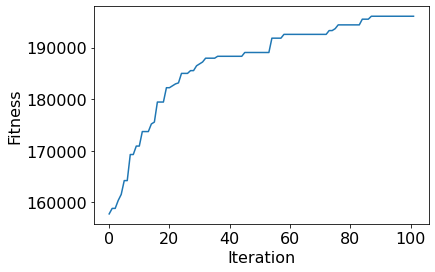

(array([0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 2, 0, 2, 3, 1, 1, 0, 3, 2, 2, 0, 1,
       1, 2, 0, 0, 0, 1, 2, 1, 3, 2, 3, 1, 2, 0, 2, 2, 1, 3, 1, 0, 0, 0,
       2, 2, 0, 0, 3, 2, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), 193883)
Parameters of the best solution : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


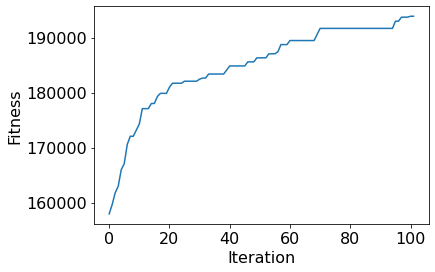

(array([3, 2, 0, 0, 1, 1, 3, 1, 1, 0, 3, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 3, 2, 3, 1, 0, 0, 2, 1, 3, 3,
       1, 2, 1, 1, 1, 0, 0, 1, 2, 3, 1, 0, 3, 0, 0, 1, 0, 3, 2, 2, 1, 3,
       3, 1, 3, 1, 1, 3, 3, 1, 2, 0, 1, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 191840)
Parameters of the best solution : [2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


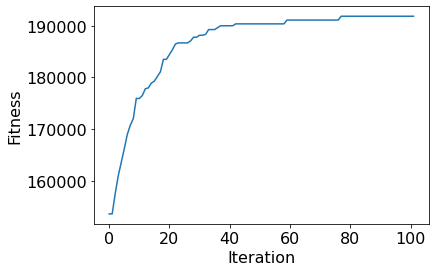

(array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 3, 0, 0, 0, 3, 2, 3, 3, 2, 0, 2, 3, 3, 0, 1, 1, 0,
       3, 3, 2, 3, 3, 1, 0, 0, 3, 2, 3, 2, 0, 0, 2, 1, 1, 2, 3, 0, 3, 3,
       1, 1, 1, 2, 2, 1, 1, 2, 3, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 196862)
Parameters of the best solution : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


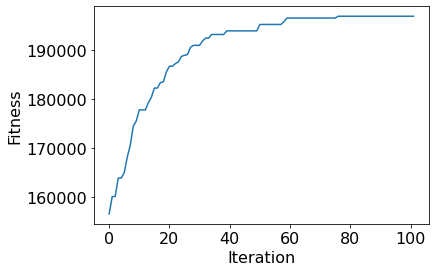

(array([0, 0, 0, 0, 0, 1, 0, 0, 3, 3, 3, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 3, 0, 3, 0, 3, 1, 0, 0, 2, 0, 2, 3, 3, 0, 0,
       3, 1, 1, 1, 0, 1, 3, 2, 0, 0, 2, 0, 2, 2, 3, 2, 2, 2, 0, 3, 3, 0,
       2, 2, 2, 0, 2, 3, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), 192577)
Parameters of the best solution : [3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


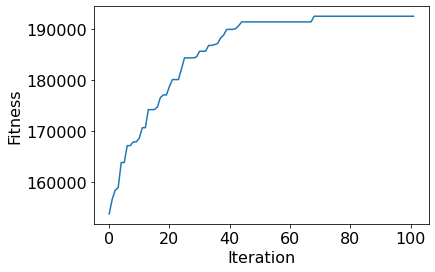

(array([1, 0, 0, 2, 3, 1, 3, 1, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 3, 2, 0, 3, 3, 1, 2, 1, 0, 0, 1, 3, 3, 0, 3,
       0, 3, 3, 3, 2, 3, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 3, 3, 2, 0, 0, 3,
       2, 1, 3, 2, 0, 0, 1, 2, 0, 3, 1, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 193883)
Parameters of the best solution : [3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


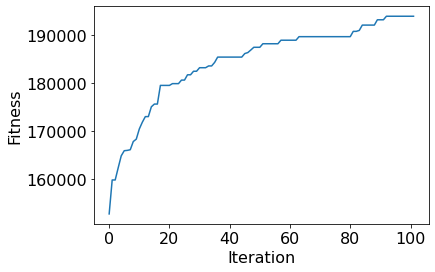

(array([0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 3, 0, 1, 3, 2, 1, 1, 3, 2, 0, 3, 2, 1, 1, 3, 2,
       1, 3, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 3, 0, 2, 3, 3, 0, 2, 0, 3, 3,
       0, 3, 2, 2, 3, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 199440)
Parameters of the best solution : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


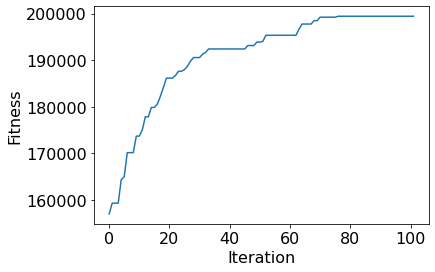

(array([0, 0, 1, 1, 3, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 3, 3, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 3, 3, 1,
       2, 1, 1, 2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 3, 1, 3, 2, 1, 2,
       3, 1, 3, 1, 1, 1, 1, 1, 2, 3, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 196461)
Parameters of the best solution : [3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


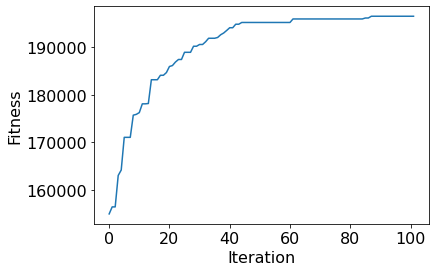

(array([0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 1, 0, 3, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1, 0, 2, 3,
       1, 1, 2, 0, 1, 0, 1, 1, 0, 3, 1, 2, 1, 1, 1, 0, 0, 0, 3, 0, 3, 0,
       1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 197231)
Parameters of the best solution : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


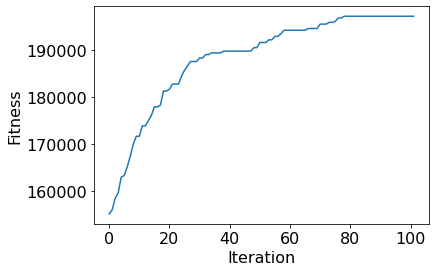

(array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 2, 3, 3, 0, 3, 1, 0, 2, 2, 2, 3, 1, 3, 0, 1, 2,
       2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 3, 0, 1, 0, 0, 2, 3, 3, 0, 3, 2,
       1, 0, 0, 3, 2, 3, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), 196494)
Parameters of the best solution : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


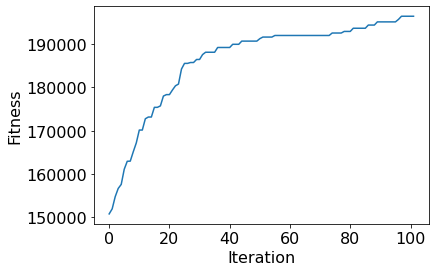

(array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 3, 1, 2, 1, 3, 1, 0, 1, 1, 0, 1, 2, 3, 2, 0, 2,
       0, 1, 3, 1, 3, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 2, 3, 0, 0,
       3, 2, 3, 3, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 198704)
Parameters of the best solution : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


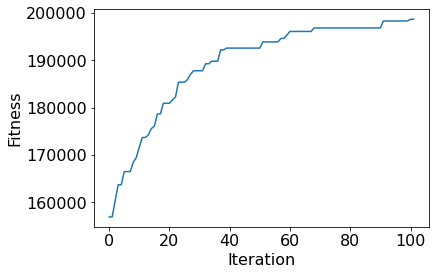

(array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 2, 0, 0, 1, 3, 1, 2, 3,
       3, 0, 3, 0, 0, 1, 3, 0, 2, 0, 0, 0, 3, 1, 1, 3, 0, 1, 0, 3, 0, 3,
       3, 0, 2, 2, 1, 3, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 199440)
Parameters of the best solution : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


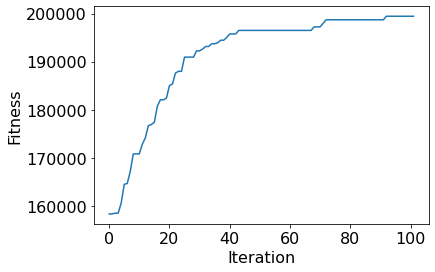

(array([2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 3, 1, 1, 0, 0, 2, 2, 0, 3, 3, 0, 1, 3, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 3, 2, 2, 0, 0, 3, 3, 2, 2,
       2, 0, 2, 1, 0, 2, 3, 0, 2, 3, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), 193347)
Parameters of the best solution : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


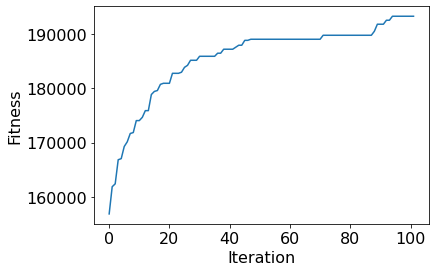

(array([1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 2, 1, 3, 3, 1, 1, 3, 3, 0, 3,
       1, 0, 3, 2, 0, 3, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 3,
       3, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 192811)
Parameters of the best solution : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


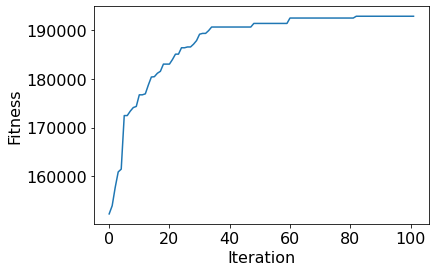

(array([0, 3, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 3, 2, 1, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0,
       0, 3, 1, 2, 1, 1, 3, 0, 1, 1, 2, 2, 1, 3, 3, 1, 1, 2, 1, 2, 3, 3,
       2, 1, 1, 0, 1, 0, 2, 0, 0, 3, 0, 1, 2, 0, 2, 3, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0]), 189832)
Parameters of the best solution : [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


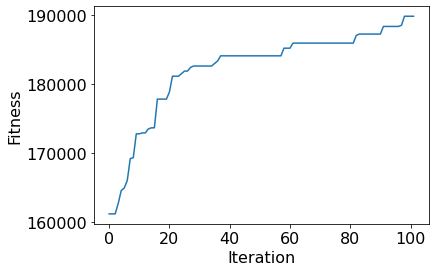

(array([1, 3, 3, 2, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 3, 0, 1, 2, 0, 0, 2, 1, 1, 3, 1, 1, 2, 3, 2,
       0, 3, 1, 3, 3, 0, 3, 0, 2, 1, 2, 0, 3, 3, 0, 2, 0, 0, 2, 0, 3, 3,
       2, 3, 3, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0]), 189631)
Parameters of the best solution : [3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


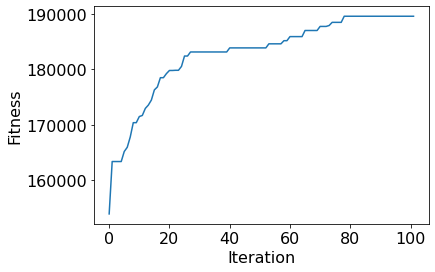

(array([0, 2, 3, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 3, 3, 1, 1, 0, 1, 2, 0, 2, 0, 0, 2, 3,
       0, 3, 3, 2, 3, 2, 3, 2, 2, 2, 1, 2, 0, 0, 3, 1, 1, 2, 1, 1, 0, 0,
       3, 0, 3, 2, 0, 1, 2, 0, 3, 3, 3, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 192979)
Parameters of the best solution : [3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


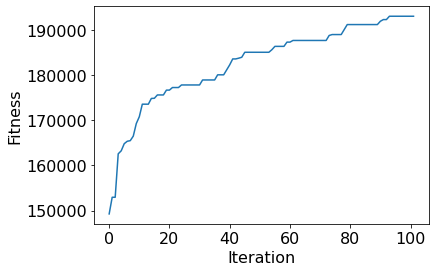

(array([0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2, 1, 3, 2, 3, 0, 3, 0, 0, 1, 3, 0,
       1, 0, 3, 3, 1, 0, 0, 2, 3, 2, 2, 1, 3, 1, 3, 1, 2, 2, 3, 2, 2, 3,
       3, 1, 0, 2, 3, 3, 2, 0, 2, 0, 3, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 193715)
Parameters of the best solution : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


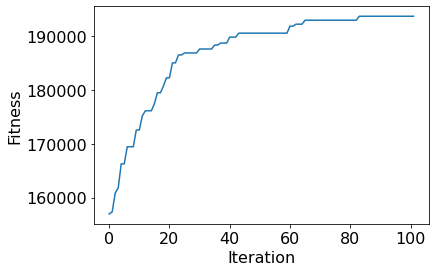

(array([0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 1, 3, 0, 2, 1, 0, 0, 2, 0, 2, 3, 3, 2, 1, 0, 3,
       0, 1, 1, 0, 3, 3, 0, 0, 1, 0, 2, 1, 1, 0, 0, 3, 3, 2, 2, 2, 1, 0,
       0, 3, 3, 1, 0, 1, 0, 2, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2]), 194787)
Parameters of the best solution : [3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


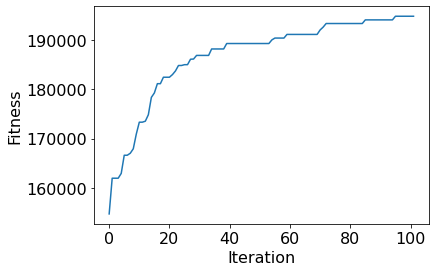

(array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 0, 3, 2, 2, 2, 0, 3, 0, 1, 1, 1, 2, 0, 3, 3, 3, 1, 3,
       3, 1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 3, 0, 2, 2, 0, 3, 1, 3, 3, 3,
       2, 0, 2, 3, 3, 3, 0, 3, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 190936)
Parameters of the best solution : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


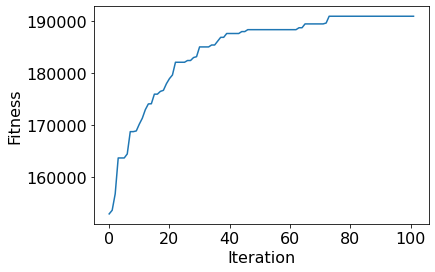

(array([0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 1, 1, 3, 0, 3, 2, 0, 1,
       2, 3, 0, 3, 2, 1, 2, 3, 2, 1, 0, 0, 1, 1, 0, 1, 1, 3, 0, 2, 3, 0,
       0, 2, 2, 0, 1, 3, 3, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 191338)
Parameters of the best solution : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


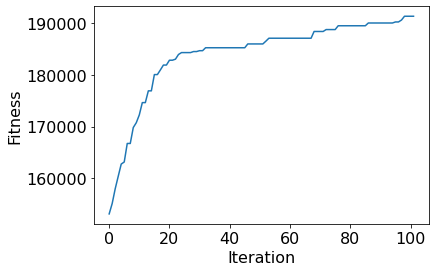

KeyboardInterrupt: 

In [12]:
num_generations = 100 # Number of generations.
sol_per_pop = 100 # 100 Number of solutions in the population.
num_parents_mating = 50 # 100 Number of solutions to be selected as parents in the mating pool.

# Parameters of the mutation operation.
mutation_percent_genes = 25 # 10 Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.
mutation_num_genes = 5 # Number of genes to mutate. If the parameter mutation_num_genes exists, then no need for the parameter mutation_percent_genes.

parent_selection_type = "tournament" # Type of parent selection.
crossover_type = "uniform" # Type of the crossover operator.
mutation_type = "random" # Type of the mutation operator.
keep_parents = 10 # 1 Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.
num_genes = 120

solutions, time_solutions = [], []
Best_global_Sequence = []
Best_global_value = -1000000

for gen in range(1,50):
    start = timeit.default_timer()
    ga_instance = pygad.GA(num_generations=num_generations, 
              sol_per_pop=sol_per_pop, 
              num_parents_mating=num_parents_mating, 
              num_genes=num_genes,
              fitness_func=fitness_func,
              mutation_percent_genes=mutation_percent_genes,
              mutation_num_genes=mutation_num_genes,
              parent_selection_type=parent_selection_type,
              crossover_type=crossover_type,
              mutation_type=mutation_type,
              keep_parents=keep_parents,
              K_tournament=3)
    ga_instance.run()
    #Your statements here
    stop = timeit.default_timer()
    best_solution, best_solution_fitness = ga_instance.best_solution()
    if gen%1 == 0:
        #print("Solution: ", gen)
        print(ga_instance.best_solution())
        print("Parameters of the best solution :", convert_fenotype(best_solution))
        #print("Fitness value of the best solution :", best_solution_fitness, " over "
        #          , round(best_solution_fitness/(120*Mills_per_day),4))
        #print('Time: ', round(stop - start,2), "seg \n")
    # After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
        ga_instance.plot_result()
    if Best_global_value < best_solution_fitness:
        Best_global_value = best_solution_fitness
        Best_global_Sequence = best_solution
    solutions.append(best_solution_fitness)    
    time_solutions.append(round(stop - start,2))
    
print('Time: ', round(stop - start,2), "seg \n")    
print("Solutions: ", solutions)
print("Best solution: ", Best_global_value, " : ", Best_global_Sequence)
print("Time solutions: ", time_solutions)

In [ ]:
print('Time: ', round(stop - start,2), "seg \n")    
print("Solutions: ", solutions)
print("Best solution: ", Best_global_value, " : ", convert_fenotype(Best_global_Sequence))
print("Time solutions: ", time_solutions)

In [ ]:
# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
best_solution, best_solution_fitness = ga_instance.best_solution()
print("Parameters of the best solution :", best_solution)
print("Fitness value of the best solution :", best_solution_fitness, "\n")

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
print("The saved instance of the genetic algorithm is loaded successfully.")
loaded_ga_instance.plot_result()
print(loaded_ga_instance.best_solution())